# Capstone Final Project: An analysis on coffee houses globally

In this project, I will use Foursquare to determine the number of coffee shops in city centres in major metropolitan cities. Next, I will use this data to understand how cities differ in their coffee culture. Secondarily, I will analyse the penetration of coffee chains.

## Data collection and processing
### Importing libraries necessary for my analysis and setting up FourSquare credentials

In [4]:
#Importing all relevant libraries

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

 # map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# importing libraries to read_excel
!conda install html5lib --yes
!conda install xlrd --yes

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-p

In [5]:
#Setting up FourSquare credentials
CLIENT_ID = '2ADNF3KMKMVQHOHBEYYRJENBU550STQVTUCSWHX3M1OV5JG1' # your Foursquare ID
CLIENT_SECRET = 'TICIXN0KTAWSH3OPJLSQ0MVHOXLFHDTZ24RILGOQFUD2AYUT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2ADNF3KMKMVQHOHBEYYRJENBU550STQVTUCSWHX3M1OV5JG1
CLIENT_SECRET:TICIXN0KTAWSH3OPJLSQ0MVHOXLFHDTZ24RILGOQFUD2AYUT


### Creating a list of cities for the analysis and the code to collect location data from geolocator

In [6]:
# Creating a list of cities

cities= ['New York', 'London','Los Angeles','Delhi','Beijing','Cape Town','Tokyo-Yokohama',
         'Shanghai','Melbourne','Sao Paulo','Nairobi','Moscow','Stockholm','Cairo','Bogota',
        'Vancouver','Lima','Mexico City','Mumbai','Bangkok','Istanbul']

# Creating an empty list for coordinates
address_book = []

# Geolocator code to append address_book
for i in cities:
   
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(i)
    latitude = location.latitude
    longitude = location.longitude
    address_book.append([i,latitude,longitude])

#converting address_boook to a Dataframe witn new column headings
address=pd.DataFrame(data=address_book,columns=['City','Latitude','Longitude'])
address.head()


,City,Latitude,Longitude
0,New York,40.712728,-74.006015
1,London,51.507322,-0.127647
2,Los Angeles,34.053691,-118.242767
3,Delhi,28.651718,77.221939
4,Beijing,39.906217,116.391276


### Creating search parameters for FourSquare

In [7]:
# entering permenant FourSquare search parameters
search_query = 'coffee'
radius=500
print('Done!')

Done!


### Defining a function to automate collection of data from FourSquare

In [8]:
# defining a function to get coffee venue data for all cities in my list

def getVenues(city_name,latitudes,longitudes):

    v_list=[] 
    for city_name, lat, lng in zip(city_name,latitudes,longitudes):
        print(city_name)
        
        # create API request URL
        url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&query={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION, 
            radius, 
            search_query, 
            LIMIT,)
        
        # make the GET request
        results = requests.get(url).json()['response']['venues']
    
        # return only the relevant information
        v_list.append([(city_name, lat, lng, v['name']) for v in results])
    
    # Create a dataframe from collected data and name columns
    coffee_houses = pd.DataFrame([item for venue in v_list for item in venue])
    coffee_houses.columns = ['City', 'Latitude', 'Longitude', 'Cafe_name']
        
    return(coffee_houses)
         

### Entering parameters to our new function to search coffee houses

In [9]:
global_venues = getVenues(city_name=address['City'],latitudes=address['Latitude'],longitudes=address['Longitude'])

New York
London
Los Angeles
Delhi
Beijing
Cape Town
Tokyo-Yokohama
Shanghai
Melbourne
Sao Paulo
Nairobi
Moscow
Stockholm
Cairo
Bogota
Vancouver
Lima
Mexico City
Mumbai
Bangkok
Istanbul


### Investigating our dataframe

In [10]:
print(global_venues.shape)
print(global_venues.dtypes)
global_venues.head()

(325, 4)
City          object
Latitude     float64
Longitude    float64
Cafe_name     object
dtype: object


,City,Latitude,Longitude,Cafe_name
0,New York,40.712728,-74.006015,Blue Spoon Coffee Co.
1,New York,40.712728,-74.006015,Proof Coffee Roaster
2,New York,40.712728,-74.006015,For Five Coffee Roasters
3,New York,40.712728,-74.006015,Coffee Cart
4,New York,40.712728,-74.006015,Hudson/Chambers Coffee Cart


### Looking at individual city data

In [11]:
Name='Melbourne'
city_venue=pd.DataFrame(global_venues.loc[global_venues['City']==Name])
print(city_venue.groupby('Cafe_name').count())

                                    City  Latitude  Longitude
Cafe_name                                                    
#coffee                                1         1          1
ALL GOOD coffee                        1         1          1
Astur coffee                           1         1          1
Axil Coffee Roasters                   1         1          1
Black Coffee Shop                      1         1          1
Cartel Coffee Roasters                 1         1          1
Cathedral Coffee                       1         1          1
Chapter House Coffee                   1         1          1
Coffee & Katsu Sando Bar (サン ドワルー)     1         1          1
Coffee + Jaffles                       1         1          1
Coffee Art School Of Australia         1         1          1
Coffee HQ                              2         2          2
Coffee Hive Australia                  1         1          1
Coffee House                           1         1          1
Coffee S

### Putting cafe information and coordinates together

In [12]:
# Creating a dataframe for number of cafes in each center
global_count=pd.DataFrame(global_venues.groupby(['City'],as_index=False)['Cafe_name'].count())

# Inserting new columms for coordinates
global_count.assign(Latitude='', Longitude='')

,City,Cafe_name,Latitude,Longitude
0,Bangkok,43,,
1,Bogota,4,,
2,Cairo,12,,
3,Cape Town,11,,
4,Istanbul,14,,
5,Lima,2,,
6,London,17,,
7,Los Angeles,9,,
8,Melbourne,50,,
9,Mexico City,10,,


In [14]:
# Creating a new coordinates list based of global_venues dataframe

coordinates=global_venues.groupby(['City'],as_index=False)['Latitude','Longitude'].mean()
coordinates.head()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Latitude,Longitude
0,Bangkok,13.754253,100.493087
1,Bogota,4.598080,-74.076044
2,Cairo,30.048819,31.243666
3,Cape Town,-33.928992,18.417396
4,Istanbul,41.009621,28.965187


In [15]:
#Creating a new dataframe to merge number cafes and coordinates

global_list = global_count.merge(coordinates, left_on='City', right_on='City')

# Reindexing dataframe and renaming columns

global_list.reindex(columns=['City','Cafe_name','Latitude','Longitude'])
global_list.rename(columns={'Cafe_name':'Cafe_count'},inplace=True)
global_list.head()

,City,Cafe_count,Latitude,Longitude
0,Bangkok,43,13.754253,100.493087
1,Bogota,4,4.598080,-74.076044
2,Cairo,12,30.048819,31.243666
3,Cape Town,11,-33.928992,18.417396
4,Istanbul,14,41.009621,28.965187


## Methods and analysis
### Creating a bubble map to see how coffee houses are distirbuted around the globe

In [16]:
# create world map
world_map = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, value, label in zip(global_list['Latitude'], global_list['Longitude'], global_list['Cafe_count'], global_list['City']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=value*20000,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  
    
world_map

### Now, we will look at penetration of coffee chains in city centres

In [17]:
# Creating an empty list to put unique coffee houses

c_list=[]

# Creating a loop to make a list of cofffe houses with unique names and counnting them

for i in cities:
   
    City=global_venues.loc[global_venues['City']==i]
    len(City.groupby('Cafe_name').nunique())
    c_list.append([i,len(City.groupby('Cafe_name').nunique())])

# Transforming list to dataframe and naming columns

unique=pd.DataFrame(c_list)
unique.columns=['City','Unique_names']

### Calculating the percentage of chains in city centres

In [18]:
# Merging cafe count and unique names dataframes
cafe_chains=global_list.merge(unique,left_on='City',right_on='City')

#Changing order of columns
chains=cafe_chains[['City','Cafe_count','Unique_names','Latitude','Longitude']]

# Calculating the percentage of independent coffee houses
A=chains['Unique_names']-1
B=chains['Cafe_count']
chains.insert(3,'Percentage_of_Chains',1-A/B)
chains.head()

,City,Cafe_count,Unique_names,Percentage_of_Chains,Latitude,Longitude
0,Bangkok,43,42,0.046512,13.754253,100.493087
1,Bogota,4,4,0.250000,4.598080,-74.076044
2,Cairo,12,12,0.083333,30.048819,31.243666
3,Cape Town,11,10,0.181818,-33.928992,18.417396
4,Istanbul,14,13,0.142857,41.009621,28.965187


### We will now create a bar chart to see how different cities rank in terms of number of coffee houses

In [19]:
# Preparing our dataframe for plotting

cafe_count=global_count.set_index(['City']) # reindexin
cafe_count_renamed=cafe_count.rename(columns={'Cafe_name':'Number_of_cafes'}) # renaming columns
cafe_count_renamed.sort_values(by='Number_of_cafes',ascending=False,inplace=True) # Sorting in descending order for venues

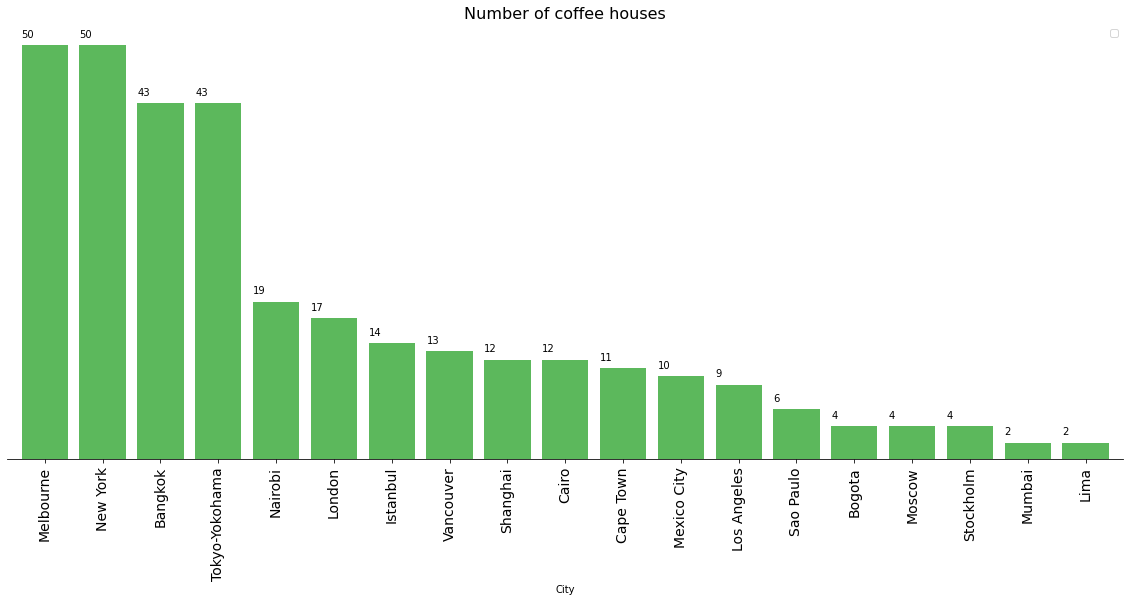

In [20]:
# Preparing dataframes to plot graphs

ax=cafe_count_renamed.plot(kind='bar',figsize=(20,8),width=0.8,color=["#5cb85c","#5bc0de","#d9534f"],fontsize=14) # plot chart
plt.title("Number of coffee houses",fontsize=16)
plt.legend('')


for value in ax.patches:
    width, height = value.get_width(), np.round(value.get_height(),2)
    x, y = value.get_xy()
    ax.annotate('{:}'.format(height), (x, y +height+1))

right=ax.spines["right"]
top=ax.spines["top"]
left=ax.spines["left"]
right.set_visible(False)
top.set_visible(False)
left.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()


### We will now look at distribution of coffee house numbers

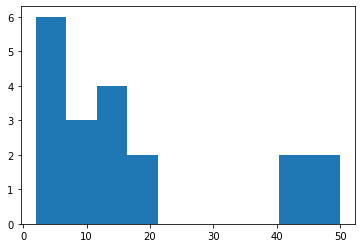

In [21]:
# Plotting a histogram to see frequency coffee venues in city centres

hist_source=global_count['Cafe_name']
plt.hist(hist_source, bins=10)
plt.show()

### We will also look at how cities rank in terms of coffee chains in city centres

In [22]:
# Preparing data to plot as a bar chart

chain_plot=chains.drop(columns=['Cafe_count','Unique_names','Latitude','Longitude']) # Dropping unnecessary columns
chain_plot.set_index('City', inplace=True) # Reindexing
chain_plot.style.format('{:.1%}') # Formating to show % signs
chain_plot.sort_values(by='Percentage_of_Chains', ascending=False,inplace=True) # Sorting in descending order

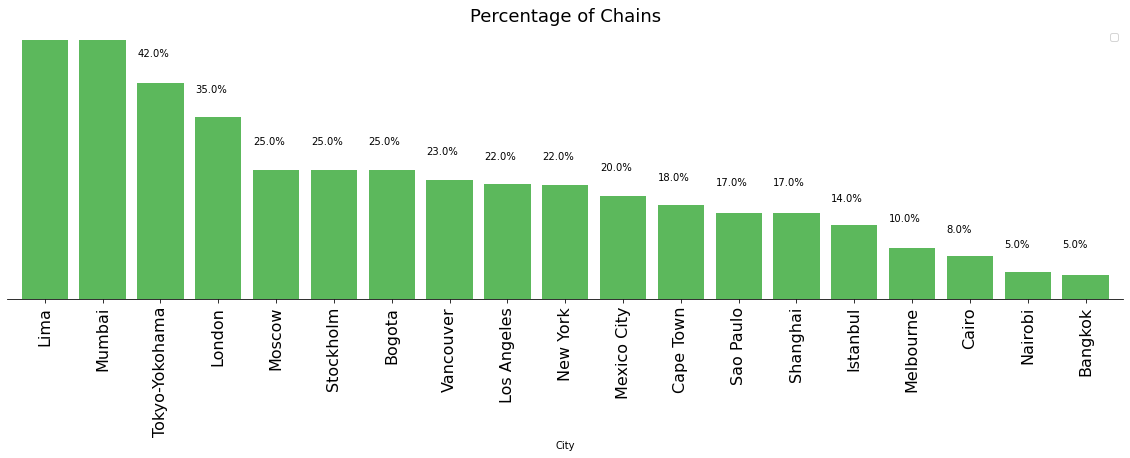

In [23]:
# Preparing dataframes to plot graphs

ax=chain_plot.plot(kind='bar',figsize=(20,5),width=0.8,color=["#5cb85c","#5bc0de","#d9534f"],fontsize=16) # plot chart
plt.title("Percentage of Chains",fontsize=18)
plt.legend('')


for value in ax.patches:
    width, height = value.get_width(), np.round(value.get_height(),2)
    x, y = value.get_xy()
    ax.annotate('{:.1%}'.format(height), (x, y + height+.05))

right=ax.spines["right"]
top=ax.spines["top"]
left=ax.spines["left"]
right.set_visible(False)
top.set_visible(False)
left.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

## Adjusting for population density in cities
### Collecting population density information

In [24]:
# Defining source to extract data
source='https://data.london.gov.uk/download/global-city-population-estimates/9c40394d-10d5-4e25-9f89-2a4b956945a4/Largest-Urban-areas-world-with-density.xlsx'

# Reading data into dataframe
city_data=pd.read_excel(source,sheet_name='Top100 largest urban areas')

# Rearranging data to fit my analysis
city_data.drop(columns=['Rank','Geography','Year','BaseYrEst','AreaSqM','Density Sq M','BaseYr'],inplace=True)
city_data.rename(columns={'Urban Area':'City'},inplace=True)

# Cleansing cells
Cleansed=pd.Series(city_data['City'].str.split(',')) # Splitting cells with commans
City_cleansed=Cleansed.str[0] # Picking required cells
city_data.insert(1,'City_names',City_cleansed) # Reinserting cleansed data to dataframe
city_data.drop(columns=['City'],inplace=True) # Dropping uncleansed data

#Dropping columns that are not required
city_density=city_data.drop(columns={'Population','AreaSqKM'})
city_density.head()

,City_names,Density Sq KM
0,Tokyo-Yokohama,4400.0
1,Jakarta (Jabotabek),9600.0
2,Delhi,11600.0
3,Seoul-Incheon,10100.0
4,Manila,14400.0


### Merging population densisty data with cafe data

In [25]:
# Merging dataframes to create a new dataframe

new_global_list=global_list.merge(city_density,left_on='City',right_on='City_names')
new_global_list.head() # Checking the new dataframe

,City,Cafe_count,Latitude,Longitude,City_names,Density Sq KM
0,Bangkok,43,13.754253,100.493087,Bangkok,6100.0
1,Bogota,4,4.598080,-74.076044,Bogota,16600.0
2,Cairo,12,30.048819,31.243666,Cairo,8600.0
3,Istanbul,14,41.009621,28.965187,Istanbul,9800.0
4,Lima,2,-12.062107,-77.036526,Lima,11300.0


### Plotting a scatter chart to see how density and number of coffee shops relate

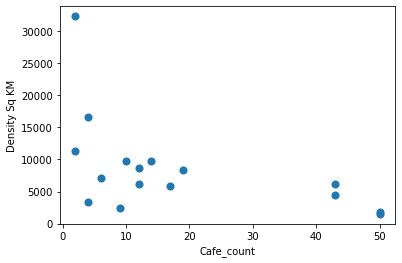

In [26]:
# Plotting a scatter chart
new_global_list.plot.scatter(x='Cafe_count',y='Density Sq KM',s=50)

### We will now calculate 'Cafe density'
#### This is the number of coffee houses divided by population density. Population density indicates number of people in a certain area.

In [27]:
# Deining a new dataframe for analysis
cafe_density=new_global_list.drop(columns=['City_names']) # Dropping unnecessary columns

# Inserting a new colum and calculating Cafe density
cafe_density.insert(3,'Cafe_density',cafe_density['Cafe_count']/cafe_density['Density Sq KM']*1000) 
cafe_density.head() # Checking the dataframe

,City,Cafe_count,Latitude,Cafe_density,Longitude,Density Sq KM
0,Bangkok,43,13.754253,7.049180,100.493087,6100.0
1,Bogota,4,4.598080,0.240964,-74.076044,16600.0
2,Cairo,12,30.048819,1.395349,31.243666,8600.0
3,Istanbul,14,41.009621,1.428571,28.965187,9800.0
4,Lima,2,-12.062107,0.176991,-77.036526,11300.0


### Mapping coffee house count adjusted for population density

In [28]:
# create world map
world_map2 = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, value, label in zip(cafe_density['Latitude'], cafe_density['Longitude'], cafe_density['Cafe_density'], cafe_density['City']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=value*10000,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map2)  
    
world_map2

## Results and discussion
In my project, I tried to analyse and understand how world metropoles differ in terms of coffee culture by looking at the number of coffee houses in their city centres.

The results showed that there are some unexpected metropoles like Melbourne that have a very high number of coffee houses in their centres. Other high ranking places like New York and London was within our expectations given that they are financial centres. The chain coffee houses are very prominent in Tokyo and London city centres which suggest the room for expansion may be limited.

I noted that FourSquare data has some short-comings for this analysis as indicated by unlikely results for cities in the Indian subcontinent. A broader discussion of the project can be found in my project report.

